# Training Classifier

<li>https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html</li>

# Classifier 2D Binaire tiktok sur un Resnet
<p> Le code utilisé est celui de notre précédent classifier qui a été modifié </p>

## Loader

### Gestion de l'accès au drive / import des bibliothèques / Gestion de l'accès au GPU

In [ ]:
########## Accès au drive ########
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
########## Positionnement dans le repertoire ########
#%cd /content/drive/MyDrive/TSP/HTI/PFE
%cd /content/drive/MyDrive/PFE
!ls

/content/drive/MyDrive/PFE
API  API-Database  Classifier_C  Classifier_RGB  Loader_2D_C.py  __pycache__  test_big	train_big


In [ ]:
###### Librairies #######
import os
import pandas as pd
from torchvision.io import read_image
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
#########################

In [ ]:
########## Gestion du GPU ###########
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # see if gpu is available
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


### Fonctions de Customisation de Dataset et de Loader

In [ ]:
########### Importation de la Classe Customisée ######
import sys
sys.path.append('Loader_2D_C.py')
print(sys.path)
from Loader_2D_C import CustomImageDataset

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', 'Loader_2D_C.py']


In [ ]:
################# Modification selon la classe  du RESNET #########@

########## Path ##########
dataset_2D = './train_big'
dataset_test_2D = './test_big'
annotation_test = dataset_test_2D + '/label_test_big.txt'
annotation = dataset_2D + '/label_big_train.txt'

Calcul de la mean et de la vairiance du dataset

In [ ]:
# Initialiser des variables pour accumuler les sommes et les sommes des carrés
sum_of_pixels = 0
sum_of_squares = 0
num_of_pixels = 0

# Parcourir le répertoire et charger chaque fichier .npy
for filename in os.listdir(dataset_2D):
    if filename.endswith('.npy'):
        filepath = os.path.join(dataset_2D, filename)
        data = np.load(filepath)  # Charger le fichier .npy

        # Accumuler les valeurs
        sum_of_pixels += np.sum(data)
        sum_of_squares += np.sum(data ** 2)
        num_of_pixels += data.size
        print(filepath)

# Calcul de la moyenne et de l'écart-type
mean = sum_of_pixels / num_of_pixels
std = np.sqrt((sum_of_squares / num_of_pixels) - (mean ** 2))
print()
print(f'Mean: {mean:.3f}, Std: {std:.3f}')

./train_big/tiktok_5_5.npy
./train_big/tiktok_6_0.npy
./train_big/tiktok_2_6.npy
./train_big/tiktok_6_7.npy
./train_big/tiktok_1_1.npy
./train_big/tiktok_3_2.npy
./train_big/tiktok_2_0.npy
./train_big/tiktok_2_3.npy
./train_big/tiktok_4_2.npy
./train_big/tiktok_2_5.npy
./train_big/tiktok_7_1.npy
./train_big/tiktok_8_0.npy
./train_big/tiktok_4_3.npy
./train_big/tiktok_1_2.npy
./train_big/tiktok_3_1.npy
./train_big/tiktok_0_0.npy
./train_big/tiktok_7_0.npy
./train_big/tiktok_8_1.npy
./train_big/tiktok_7_2.npy
./train_big/tiktok_5_7.npy
./train_big/tiktok_5_0.npy
./train_big/tiktok_5_3.npy
./train_big/tiktok_4_0.npy
./train_big/tiktok_6_4.npy
./train_big/tiktok_4_5.npy
./train_big/tiktok_5_1.npy
./train_big/tiktok_3_0.npy
./train_big/tiktok_1_3.npy
./train_big/tiktok_8_2.npy
./train_big/tiktok_1_5.npy
./train_big/tiktok_6_2.npy
./train_big/tiktok_5_2.npy
./train_big/tiktok_7_3.npy
./train_big/tiktok_1_4.npy
./train_big/tiktok_2_4.npy
./train_big/tiktok_1_6.npy
./train_big/tiktok_4_7.npy
.

In [ ]:
##### Image preprocessing #####
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(576, antialias=True),  # image batch, resize smaller edge to 576
        transforms.CenterCrop(576),  # image batch, center crop to square 576x576
        transforms.Normalize(mean=[mean, mean, mean], std=[std, std, std])
])

In [ ]:
array = np.zeros((5, 5))
print(array.shape)
array2 = np.stack((array,)*3, axis=-1)
array3 = np.stack((array)*3, axis=0)
array4 = np.stack((array)*3, axis=1)
print(array2.shape, array3.shape, array4.shape)
print(array2)


(5, 5)
(5, 5, 3) (5, 5) (5, 5)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### Instance des Datasets et Loaders

In [ ]:
############## Paramètre ################
batch_size = 64

############## Train Part ###############
train_set = CustomImageDataset(
    annotations_file = annotation,
    npy_dir = dataset_2D,
    transform=preprocess
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

############## Test Part ################

test_set = CustomImageDataset(
    annotations_file = annotation_test,
    npy_dir = dataset_test_2D,
    transform=preprocess
)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



In [ ]:
sample_1 = train_set[0][0]
print(sample_1.shape)
print()
print(train_set[1])
print("max value : ", torch.max(sample_1), "min value : ", torch.min(sample_1))

torch.Size([3, 576, 576])

(tensor([[[0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         ...,
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052]],

        [[0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         ...,
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052]],

        [[0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.0052,  ..., 0.0052, 0.0052, 0.0052],
         [0.0052, 0.0052, 0.00

### Try loader

torch.Size([3, 576, 576])


<function matplotlib.pyplot.show(close=None, block=None)>

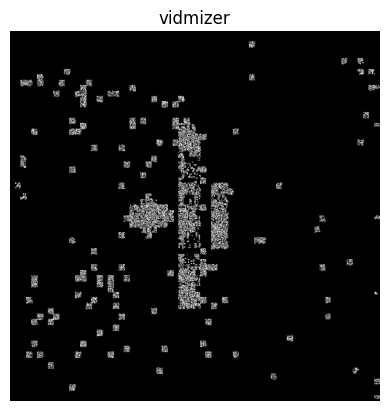

In [ ]:
###### Fonction d'affichage ######
def denormalize(img_tensor):
        inverse_normalize = transforms.Normalize(
            mean=[-mean/std, -mean/std, -mean/std],
            std=[1/std, 1/std, 1/std]
        )
        return (inverse_normalize(img_tensor) * 255.).type(torch.uint8).permute(1, 2, 0).numpy()

labels_map = {

    0: "tiktok" ,
    1: "vidmizer",
    2: "youtube",
}

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = images[0]
label = labels[0]
print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show


## Classifier

### Define the Convolutional Neural Network ( Utilisation de ResNet )

In [ ]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm



In [ ]:
net = torchvision.models.resnet18(weights=None)
num_ftrs = net.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
net.fc = nn.Linear(num_ftrs, 3)

In [ ]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Define a Loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)

In [ ]:
num_class = 3

def quality_measurement(confusion_matrix):
    line_sum=torch.sum(confusion_matrix,dim=1)
    column_sum = torch.sum(confusion_matrix, dim=0)
    total_sum=torch.sum(confusion_matrix)
    Accuracy=torch.sum(torch.diag(confusion_matrix))/total_sum
    Precision=torch.diag(confusion_matrix)/line_sum
    Recall=torch.diag(confusion_matrix)/column_sum
    F1_score = 2 * (Precision * Recall)/(Precision+Recall)
    Pfa=(line_sum - torch.diag(confusion_matrix))/total_sum
    Pmd=(column_sum - torch.diag(confusion_matrix))/total_sum
    print("Accuracy : {}".format(Accuracy.item()))
    print("Precision 0 : {} - Precision 1 : {}".format(Precision[0],Precision[1]))
    print("Recall 0 : {} - Recall 1 : {}".format(Recall[0], Recall[1]))
    print("F1 score 0 : {} - F1 score 1 : {}".format(F1_score[0], F1_score[1]))
    print("Pfa 0 : {} - Pfa 1 : {}".format(Pfa[0], Pfa[1]))
    print("Pmd 0 : {} - Pmd 1 : {}".format(Pmd[0], Pmd[1]))
    return torch.nanmean(Accuracy),torch.nanmean(Precision),torch.nanmean(Recall),torch.nanmean(Recall),torch.nanmean(Pfa),torch.nanmean(Pmd)

def test_accuracy():
  net.eval()
  correct = 0
  total = 0
  confusion_matrix=torch.zeros((num_class,num_class),device=device)
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_loader:
          images, labels = data

          images = images.to(device)
          labels = labels.to(device)

          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          for i in range(len(labels)):
                label=int(labels[i])
                confusion_matrix[predicted[i],label]=confusion_matrix[predicted[i],label]+1
  net.train()
  print(quality_measurement(confusion_matrix))
  return  correct / total, confusion_matrix

In [ ]:
list_lr = [0.1]
loss_saveds=[]
accuracy_saveds=[]
test_accuracy_saveds=[]



for lr_v in list_lr :
  net = torchvision.models.resnet18(weights=None)
  num_ftrs = net.fc.in_features
  net.fc = nn.Linear(num_ftrs, 3)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr_v)
  scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)
  net = net.to(device)
  loss_saved=[]
  accuracy_saved=[]
  test_accuracy_saved=[]


  for epoch in tqdm(range(50)):  # loop over the dataset multiple times

      running_loss = 0.0
      correct = 0
      total = 0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)

          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()


      loss_saved.append(running_loss/((i+1)*batch_size))
      accuracy_saved.append(correct / total)
      running_loss = 0.0
      scheduler.step()

      test_accuracy_val, matrice_confusion = test_accuracy()
      test_accuracy_saved.append(test_accuracy_val)

  print('Finished Training')
  print('Loss : ' , loss_saved)
  print('Accuracy : ' , accuracy_saved)
  print('Accuracy : ' , test_accuracy_saved)
  print( 'Matrice de confusion : ' , matrice_confusion)
  loss_saveds.append(loss_saved)
  accuracy_saveds.append(accuracy_saved)
  test_accuracy_saveds.append(test_accuracy_saved)
  PATH = f'./resnet18_{lr_v}_mutli.pth'
  torch.save(net.state_dict(), PATH)


  0%|          | 0/50 [00:00<?, ?it/s]

Accuracy : 0.2916666567325592
Precision 0 : 0.3181818127632141 - Precision 1 : 0.0
Recall 0 : 0.875 - Recall 1 : 0.0
F1 score 0 : 0.46666669845581055 - F1 score 1 : nan
Pfa 0 : 0.625 - Pfa 1 : 0.0833333358168602
Pmd 0 : 0.0416666679084301 - Pmd 1 : 0.3333333432674408


  2%|▏         | 1/50 [00:31<25:45, 31.54s/it]

(tensor(0.2917, device='cuda:0'), tensor(0.1591, device='cuda:0'), tensor(0.2917, device='cuda:0'), tensor(0.2917, device='cuda:0'), tensor(0.2361, device='cuda:0'), tensor(0.2361, device='cuda:0'))


  4%|▍         | 2/50 [00:39<14:08, 17.69s/it]

Accuracy : 0.3333333432674408
Precision 0 : 0.3333333432674408 - Precision 1 : 0.3333333432674408
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.48275864124298096 - F1 score 1 : 0.1818181872367859
Pfa 0 : 0.5833333134651184 - Pfa 1 : 0.0833333358168602
Pmd 0 : 0.0416666679084301 - Pmd 1 : 0.2916666567325592
(tensor(0.3333, device='cuda:0'), tensor(0.3333, device='cuda:0'), tensor(0.3333, device='cuda:0'), tensor(0.3333, device='cuda:0'), tensor(0.2222, device='cuda:0'), tensor(0.2222, device='cuda:0'))


  6%|▌         | 3/50 [00:49<11:06, 14.19s/it]

Accuracy : 0.4166666567325592
Precision 0 : 0.4285714328289032 - Precision 1 : nan
Recall 0 : 0.75 - Recall 1 : 0.0
F1 score 0 : 0.5454545021057129 - F1 score 1 : nan
Pfa 0 : 0.3333333432674408 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.3333333432674408
(tensor(0.4167, device='cuda:0'), tensor(0.4143, device='cuda:0'), tensor(0.4167, device='cuda:0'), tensor(0.4167, device='cuda:0'), tensor(0.1944, device='cuda:0'), tensor(0.1944, device='cuda:0'))


  8%|▊         | 4/50 [00:57<09:03, 11.82s/it]

Accuracy : 0.5416666865348816
Precision 0 : 0.6666666865348816 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.25
F1 score 0 : 0.7058823108673096 - F1 score 1 : 0.4000000059604645
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.25
(tensor(0.5417, device='cuda:0'), tensor(0.6838, device='cuda:0'), tensor(0.5417, device='cuda:0'), tensor(0.5417, device='cuda:0'), tensor(0.1528, device='cuda:0'), tensor(0.1528, device='cuda:0'))


 10%|█         | 5/50 [01:07<08:17, 11.07s/it]

Accuracy : 0.375
Precision 0 : nan - Precision 1 : 1.0
Recall 0 : 0.0 - Recall 1 : 0.125
F1 score 0 : nan - F1 score 1 : 0.2222222238779068
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.3333333432674408 - Pmd 1 : 0.2916666567325592
(tensor(0.3750, device='cuda:0'), tensor(0.6739, device='cuda:0'), tensor(0.3750, device='cuda:0'), tensor(0.3750, device='cuda:0'), tensor(0.2083, device='cuda:0'), tensor(0.2083, device='cuda:0'))


 12%|█▏        | 6/50 [01:16<07:35, 10.36s/it]

Accuracy : 0.4166666567325592
Precision 0 : 0.3636363744735718 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.25
F1 score 0 : 0.5333333611488342 - F1 score 1 : 0.4000000059604645
Pfa 0 : 0.5833333134651184 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.25
(tensor(0.4167, device='cuda:0'), tensor(0.6818, device='cuda:0'), tensor(0.4167, device='cuda:0'), tensor(0.4167, device='cuda:0'), tensor(0.1944, device='cuda:0'), tensor(0.1944, device='cuda:0'))


 14%|█▍        | 7/50 [01:24<06:56,  9.68s/it]

Accuracy : 0.6666666865348816
Precision 0 : 0.6666666865348816 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.7058823108673096 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.6667, device='cuda:0'), tensor(0.7222, device='cuda:0'), tensor(0.6667, device='cuda:0'), tensor(0.6667, device='cuda:0'), tensor(0.1111, device='cuda:0'), tensor(0.1111, device='cuda:0'))


 16%|█▌        | 8/50 [01:34<06:47,  9.71s/it]

Accuracy : 0.75
Precision 0 : 1.0 - Precision 1 : 0.8333333134651184
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7142857313156128
Pfa 0 : 0.0 - Pfa 1 : 0.0416666679084301
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.0833, device='cuda:0'), tensor(0.0833, device='cuda:0'))


 18%|█▊        | 9/50 [01:42<06:16,  9.19s/it]

Accuracy : 0.6666666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.25
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.4000000059604645
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.25
(tensor(0.6667, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.6667, device='cuda:0'), tensor(0.6667, device='cuda:0'), tensor(0.1111, device='cuda:0'), tensor(0.1111, device='cuda:0'))


 20%|██        | 10/50 [01:52<06:18,  9.46s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 22%|██▏       | 11/50 [02:05<06:48, 10.48s/it]

Accuracy : 0.8333333134651184
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.0833333358168602
(tensor(0.8333, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 24%|██▍       | 12/50 [02:16<06:40, 10.53s/it]

Accuracy : 0.8333333134651184
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.0833333358168602
(tensor(0.8333, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 26%|██▌       | 13/50 [02:25<06:14, 10.12s/it]

Accuracy : 0.8333333134651184
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.0833333358168602
(tensor(0.8333, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 28%|██▊       | 14/50 [02:34<05:53,  9.82s/it]

Accuracy : 0.8333333134651184
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.0833333358168602
(tensor(0.8333, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 30%|███       | 15/50 [02:42<05:24,  9.27s/it]

Accuracy : 0.8333333134651184
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.0833333358168602
(tensor(0.8333, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 32%|███▏      | 16/50 [02:51<05:15,  9.29s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 34%|███▍      | 17/50 [02:59<04:53,  8.89s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 36%|███▌      | 18/50 [03:09<04:56,  9.28s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 38%|███▊      | 19/50 [03:18<04:44,  9.19s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 40%|████      | 20/50 [03:27<04:33,  9.12s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 42%|████▏     | 21/50 [03:38<04:34,  9.47s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 44%|████▍     | 22/50 [03:45<04:12,  9.00s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 46%|████▌     | 23/50 [03:55<04:07,  9.18s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 48%|████▊     | 24/50 [04:03<03:49,  8.82s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 50%|█████     | 25/50 [04:13<03:51,  9.25s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 52%|█████▏    | 26/50 [04:22<03:38,  9.09s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 54%|█████▍    | 27/50 [04:30<03:22,  8.81s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 56%|█████▌    | 28/50 [04:40<03:18,  9.00s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 58%|█████▊    | 29/50 [04:48<03:03,  8.76s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 60%|██████    | 30/50 [04:58<03:02,  9.13s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 62%|██████▏   | 31/50 [05:07<02:51,  9.00s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 64%|██████▍   | 32/50 [05:15<02:41,  8.99s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 66%|██████▌   | 33/50 [05:24<02:31,  8.90s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 68%|██████▊   | 34/50 [05:32<02:19,  8.70s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 70%|███████   | 35/50 [05:42<02:12,  8.86s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 72%|███████▏  | 36/50 [05:50<02:00,  8.60s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 74%|███████▍  | 37/50 [06:00<01:59,  9.16s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 76%|███████▌  | 38/50 [06:08<01:46,  8.85s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 78%|███████▊  | 39/50 [06:17<01:38,  8.96s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 80%|████████  | 40/50 [06:26<01:29,  8.96s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 82%|████████▏ | 41/50 [06:34<01:18,  8.69s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 84%|████████▍ | 42/50 [06:44<01:11,  8.97s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 86%|████████▌ | 43/50 [06:52<01:01,  8.72s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 88%|████████▊ | 44/50 [07:02<00:54,  9.11s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 90%|█████████ | 45/50 [07:11<00:44,  8.96s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 92%|█████████▏| 46/50 [07:20<00:35,  8.93s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 94%|█████████▍| 47/50 [07:29<00:26,  8.97s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 96%|█████████▌| 48/50 [07:37<00:17,  8.64s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 98%|█████████▊| 49/50 [07:46<00:08,  8.92s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


100%|██████████| 50/50 [07:54<00:00,  9.48s/it]

Accuracy : 0.7916666865348816
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0833333358168602 - Pmd 1 : 0.125
(tensor(0.7917, device='cuda:0'), tensor(0.8718, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.7917, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))
Finished Training
Loss :  [0.017051339149475098, 0.015654781212409336, 0.011522405470410982, 0.009848969367643198, 0.013333527371287346, 0.02454948207984368, 0.009430527376631895, 0.00770193338394165, 0.00693771926065286, 0.010560885382195314, 0.005914238591988881, 0.005322605061034362, 0.005301628882686297, 0.0053290122499068575, 0.005217022107293208, 0.005149794975295663, 0.005279943657418092, 0.00495530990883708, 0.004788617603480816, 0.004963019009058674, 0.00484684924595058, 0.0048345220275223255, 0.004812570288777351, 0.004314312323306997, 0.004330309

### Print de la loss en fonction des epochs

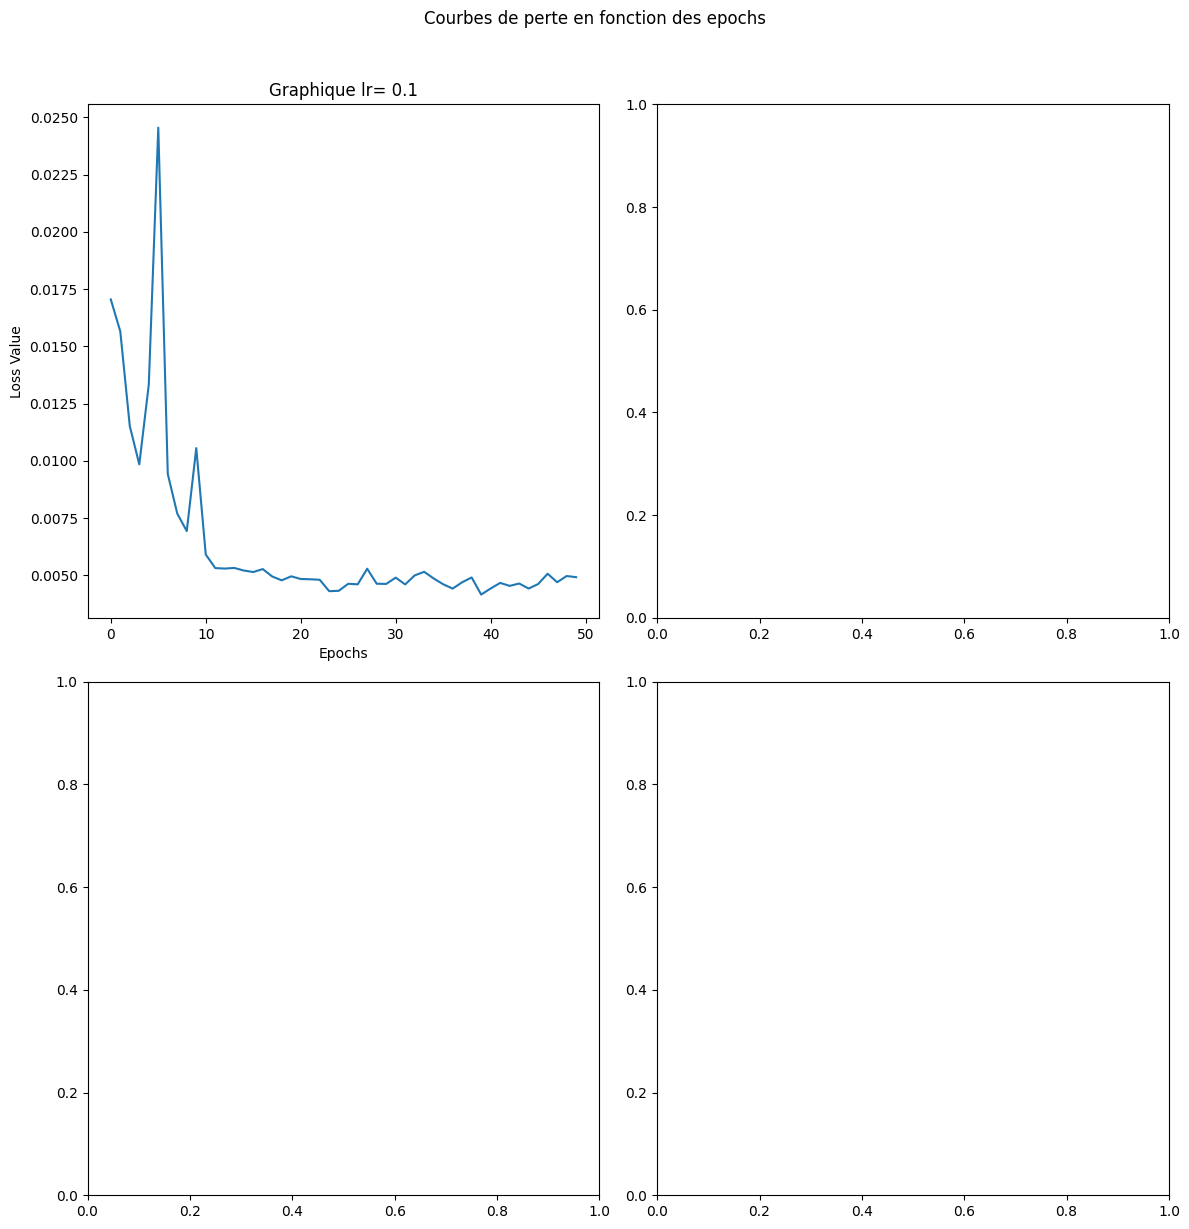

In [ ]:
import matplotlib.pyplot as plt

# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes de perte en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, loss_saved in enumerate(loss_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(loss_saved)

    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss Value')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Print de l'accuracy en fonction des epochs

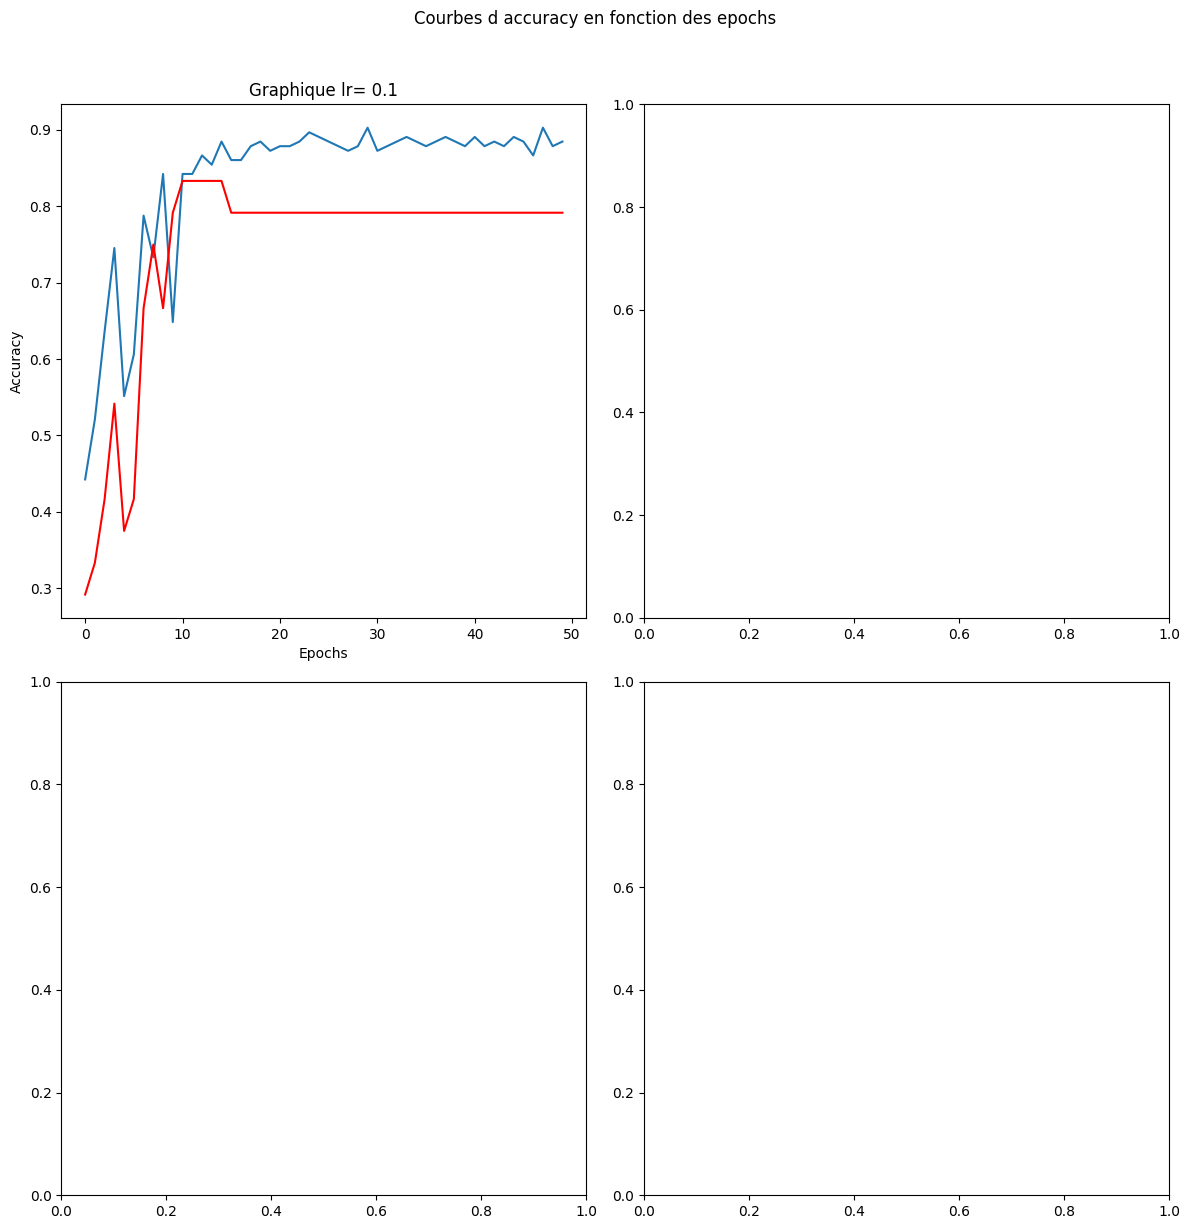

In [ ]:
# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes d accuracy en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, accuracy_saved in enumerate(accuracy_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(accuracy_saved,label='train')
    ax.plot(test_accuracy_saveds[i],color='r',label='test')

    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Test the network on the test data

#### First test on one frame

torch.Size([3, 576, 576])


<function matplotlib.pyplot.show(close=None, block=None)>

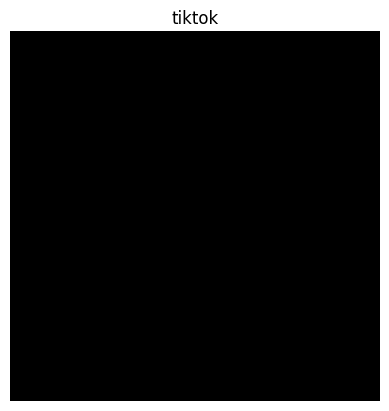

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images.to(device)
labels = labels.to(device)

img = images[0].cpu()  # Copie le tensor sur le CPU
label = labels[0].cpu()  # Copie le tensor sur le CPU

print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
predicted = predicted.cpu()  # Copie le tensor sur le CPU
print(labels_map[int(predicted[0].numpy())])


youtube


#### Let us look at how the network performs on the whole dataset

#### Result by class

In [ ]:
classes = ('tiktok','vidmizer','youtube')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)  # Copie les images sur le GPU
        labels = labels.to(device)  # Copie les étiquettes sur le GPU
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: tiktok is 75.0 %
Accuracy for class: vidmizer is 75.0 %
Accuracy for class: youtube is 100.0 %
